In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

plt.style.use('fivethirtyeight')

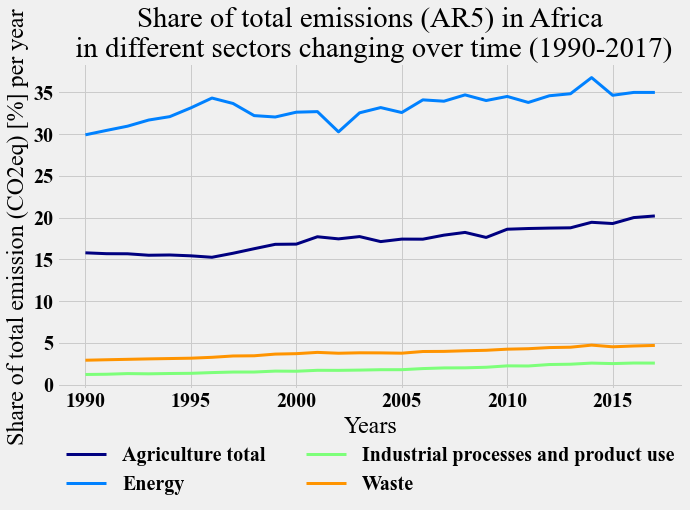

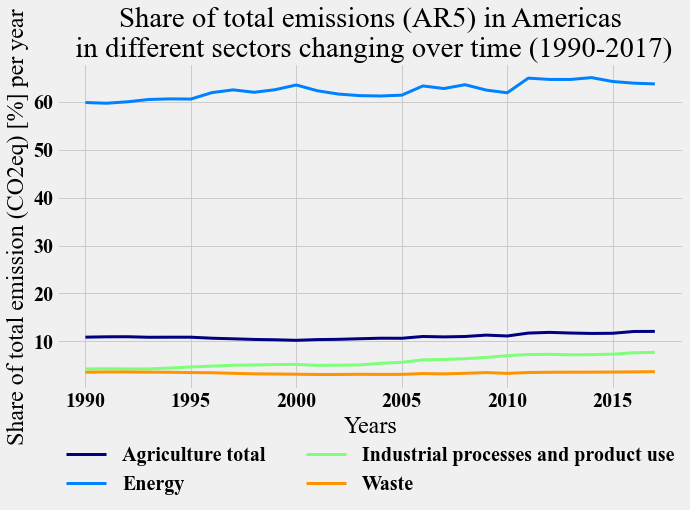

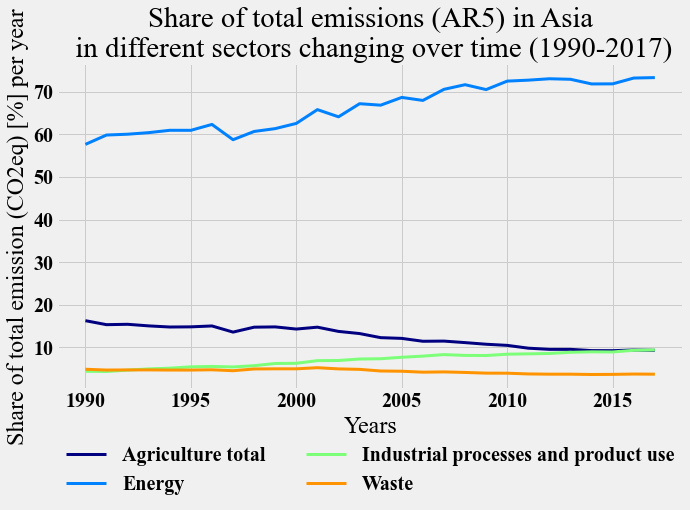

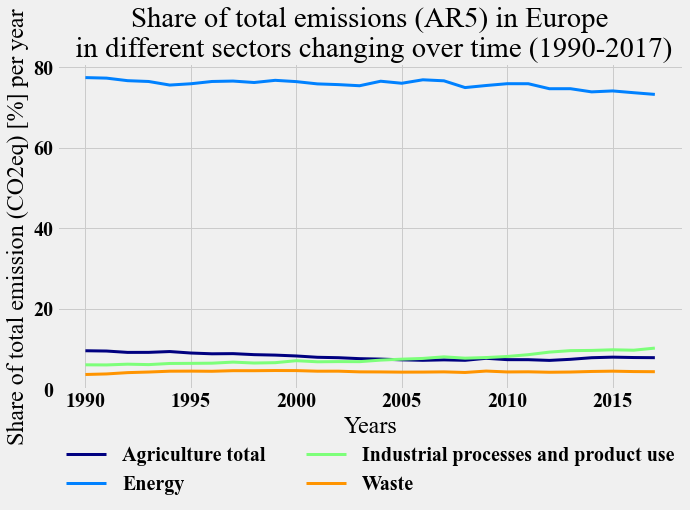

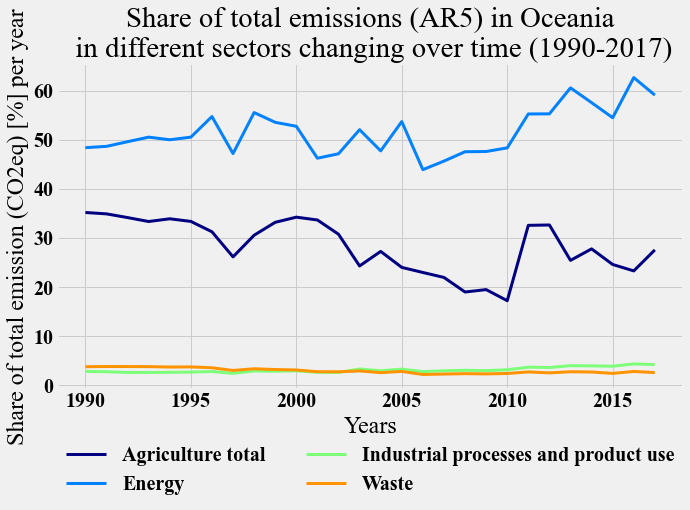

In [3]:
# Emissions per region over time in different sectors
# -----------------------------------------------------------------------------------------------------------------------

emissions_df = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/emissions shares/FAOSTAT_data_4-30-2021_(share_by_region_sector).csv')


def co2eqemissions_regions_sectors(region_name):
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 20}
    plt.rc('font', **font)
    fig, ax = plt.subplots(figsize=(10, 7))

    jet = plt.get_cmap('jet')
    colors = iter(jet(np.linspace(0, 1, 5)))

    for sector in emissions_df['Item'].unique():
        x = emissions_df.loc[(emissions_df['Item'] == sector)
                                 & (emissions_df['Area'] == region_name)
                             & (emissions_df['Element'] == 'Share of total emissions (AR5)')]['Year']
        y = emissions_df.loc[(emissions_df['Item'] == sector)
                                 & (emissions_df['Area'] == region_name)
                             & (emissions_df['Element'] == 'Share of total emissions (AR5)')]['Value']
        plt.plot(x, y, color=next(colors), label=sector, linewidth=3.0)

    plt.ylabel('Share of total emission (CO2eq) [%] per year')
    plt.xlabel('Years')
    plt.title('Share of total emissions (AR5) in ' + region_name +
              '\n in different sectors changing over time (1990-2017)')
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.2,
                     box.width, box.height * 0.8])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
              fancybox=True, shadow=True, ncol=2, borderaxespad=0, frameon=False)
    plt.show()


co2eqemissions_regions_sectors('Africa')
co2eqemissions_regions_sectors('Americas')
co2eqemissions_regions_sectors('Asia')
co2eqemissions_regions_sectors('Europe')
co2eqemissions_regions_sectors('Oceania')

In [4]:
# Nitrogen inputs and nitrogen emissions correlation
# -----------------------------------------------------------------------------------------------------------------------

nitrogen_emissions_df = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/emissions shares/FAOSTAT_data_4-30-202190_(gg_nitrogen_firtilize).csv')
nutrients_region_df = pd.read_csv('D:/studying/RheinWaalUni/3d semester/data procurement/nutrients_kg_ha/FAOSTAT_data_4-27-2021_(by region).csv')


def get_xy_per_region(region_name):
    x = nitrogen_emissions_df.loc[(nitrogen_emissions_df['Element'] == 'Emissions (CO2eq) from N2O') &
                                  (nitrogen_emissions_df['Area'] == region_name)]['Value']
    y = nutrients_region_df.loc[(nutrients_region_df['Item'] == 'Nutrient nitrogen N (total)') &
                                (nutrients_region_df['Area'] == region_name)]['Value']
    x.index = np.arange(0, 58)
    y.index = np.arange(0, 58)
    return x, y


def regression_plot(region_name):
    x, y = get_xy_per_region(region_name)

    cor_coef = x.corr(y)

    left = 0.1
    bottom = 0.1
    top = 0.8
    right = 0.8
    slope, intercept, r, p, stderr = scipy.stats.linregress(x, y)
    line = f'Regression line: y={intercept:.2f}+{slope:.4f}x, r={cor_coef:.3f}'
    font = {'family': 'Times New Roman', 'weight': 'bold', 'size': 15}
    plt.rc('font', **font)
    plt.figure(figsize=(7, 7))

    main_ax = plt.axes([left,bottom,right-left,top-bottom])
    # create axes to the top and right of the main axes and hide them
    top_ax = plt.axes([left, top, right - left, 1-top])
    plt.axis('off')
    right_ax = plt.axes([right, bottom, 1-right, top-bottom])
    plt.axis('off')
    main_ax.plot(x,  y, 'ko', alpha=0.5, label='Data points')
    right_ax.violinplot(y, positions=[0], widths=1., showmedians=True,  showmeans=True)
    top_ax.violinplot(x, positions=[0], vert=False, widths=1., showmedians=True, showmeans=True)
    # set the limits to the box axes
    top_ax.set_xlim(main_ax.get_xlim())
    top_ax.set_ylim(-1,1)
    right_ax.set_ylim(main_ax.get_ylim())
    right_ax.set_xlim(-1,1)

    y_est = intercept + slope * x
    main_ax.plot(x, y_est, label=line)
    #main_ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
    main_ax.set_xlabel('Emissions (CO2eq) from N2O [gigagrams/year]')
    main_ax.set_ylabel('Fertilizers indicators [kg/ha/year]')
    main_ax.legend(loc='upper left')

    plt.show()


def calc_tstat_pearson(pearson_coff, sample_size):
    t = (pearson_coff * np.sqrt(sample_size-2))/np.sqrt(1-(pearson_coff**2))
    return t


def pearson_cor_test(region_name):
    x, y = get_xy_per_region(region_name)
    if len(x) != len(y):
        return 1
    data_size = len(x)
    cor_coef = x.corr(y)
    t_statistics = calc_tstat_pearson(cor_coef, data_size)
    p_value = scipy.stats.t.pdf(t_statistics, df=data_size-1)
    print('T-statistcs: {}'.format(t_statistics))
    print('P-value: {}'.format(p_value))

Nutrient N usage and its emissions dependency in Africa

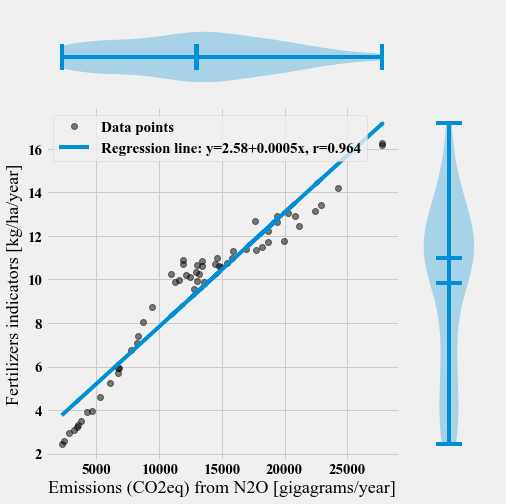

In [5]:
regression_plot('Africa')

Nutrient N usage and its emissions dependency in Americas

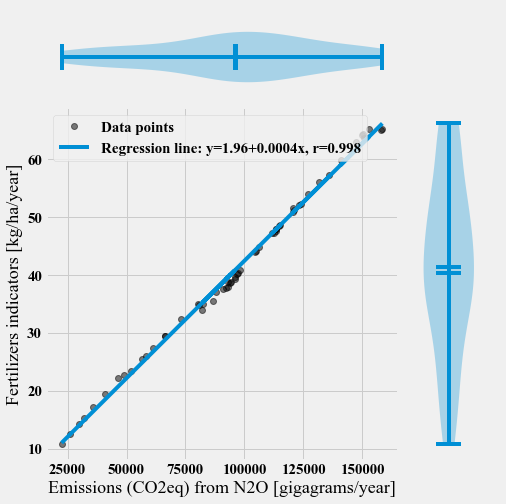

In [6]:
regression_plot('Americas')

Nutrient N usage and its emissions dependency in Asia

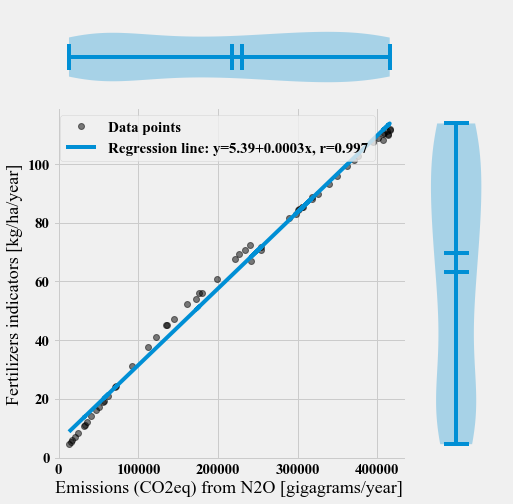

In [7]:
regression_plot('Asia')

Nutrient N usage and its emissions dependency in Europe

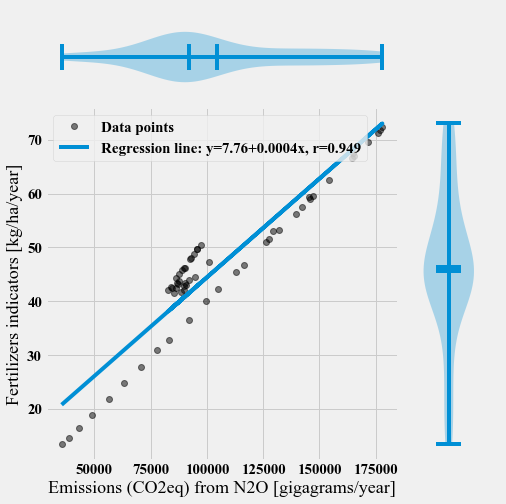

In [8]:
regression_plot('Europe')

Nutrient N usage and its emissions dependency in Oceania

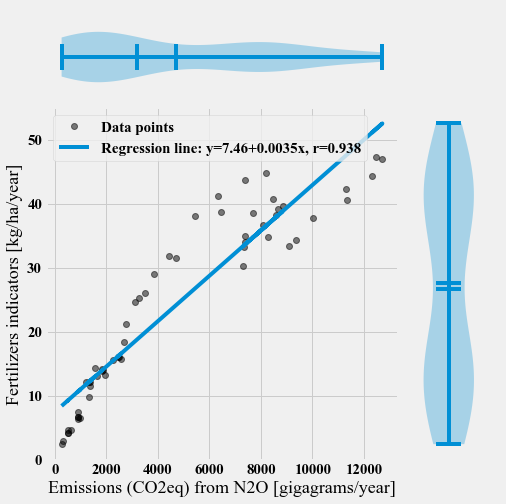

In [9]:
regression_plot('Oceania')

Significance test for correlation (Africa region)

In [10]:
pearson_cor_test('Africa')

T-statistcs: 26.98997657323062
P-value: 3.637447444021074e-34


Significance test for correlation (Americas region)

In [11]:
pearson_cor_test('Americas')

T-statistcs: 128.2547990711867
P-value: 1.6126453182496785e-72


Significance test for correlation (Asia region)

In [12]:
pearson_cor_test('Asia')

T-statistcs: 102.44424364797692
P-value: 6.964319388510186e-67


Significance test for correlation (Europe region)

In [13]:
pearson_cor_test('Europe')

T-statistcs: 22.54614389753444
P-value: 5.042528032905303e-30


Significance test for correlation (Oceania region)

In [14]:
pearson_cor_test('Oceania')


T-statistcs: 20.23281174157199
P-value: 1.3374529320553248e-27
